<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up-Environment" data-toc-modified-id="Set-Up-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up Environment</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Test split</a></span></li><li><span><a href="#Dummify-dataset" data-toc-modified-id="Dummify-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dummify dataset</a></span></li><li><span><a href="#Scale-the-values" data-toc-modified-id="Scale-the-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scale the values</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling</a></span></li></ul></div>

## Set Up Environment

In [1]:
import sys
sys.path.insert(0,'..')
import preprocessing_module as pm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings(action="ignore")

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
# from collections import Counter
# from sklearn.utils.class_weight import compute_sample_weight

## Load Data

In [3]:
accepted = pd.read_csv('../data/accepted_2007_to_2018Q4.csv')
accepted_clean = pm.datacleaning(accepted)

In [4]:
y = accepted_clean.loan_status
X = accepted_clean.drop('loan_status',1)

In [5]:
print(X.shape)
X.head()

(482335, 32)


,open_acc,total_acc,inq_last_6mths,collections_12_mths_ex_med,tot_coll_amt,revol_bal,pub_rec,pub_rec_bankruptcies,acc_now_delinq,all_util,revol_util,delinq_2yrs,initial_list_status,tot_cur_bal,avg_cur_bal,int_rate,dti,home_ownership,annual_inc,purpose,emp_length,term,addr_state,installment,mort_acc,application_type,verification_status,fico_range_low,fico_range_high,loan_amnt,grade,length_cr_line
421101,7.0,30.0,0.0,0.0,0.0,141.0,0.0,0.0,0.0,1.0,0.5,0.0,w,150592.0,25099.0,7.34,0.58,RENT,52000.0,major_purchase,9 years,36 months,WA,93.10,4.0,Individual,Source Verified,760.0,764.0,3000.0,A,20.0
421113,14.0,24.0,0.0,0.0,0.0,11449.0,1.0,1.0,0.0,47.0,33.9,0.0,w,28880.0,2222.0,11.98,14.18,OWN,55000.0,other,10+ years,36 months,GA,166.03,0.0,Individual,Not Verified,675.0,679.0,5000.0,B,17.0
421120,13.0,29.0,0.0,0.0,0.0,5004.0,0.0,0.0,0.0,90.0,36.0,0.0,w,131726.0,10977.0,11.98,20.25,MORTGAGE,40000.0,home_improvement,< 1 year,36 months,TX,232.44,0.0,Individual,Verified,695.0,699.0,7000.0,B,11.0
421135,11.0,26.0,1.0,0.0,0.0,29222.0,0.0,0.0,0.0,69.0,53.2,0.0,w,157566.0,14324.0,21.85,27.58,OWN,57000.0,debt_consolidation,10+ years,36 months,FL,1143.39,2.0,Individual,Verified,680.0,684.0,30000.0,D,18.0
421137,15.0,27.0,0.0,0.0,0.0,14591.0,0.0,0.0,0.0,34.0,34.2,1.0,w,128270.0,8551.0,20.39,15.76,OWN,85000.0,home_improvement,10+ years,60 months,NY,560.94,3.0,Individual,Source Verified,665.0,669.0,21000.0,D,10.0


## Train Test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

## Dummify dataset

In [7]:
X_train_dum, X_test_dum = pm.Dummify(X_train, X_test)

## Scale the values

In [8]:
scaler = MinMaxScaler()
X_train_stan = pd.DataFrame(scaler.fit_transform(X_train_dum), columns=X_train_dum.columns)
X_test_stan = pd.DataFrame(scaler.transform(X_test_dum), columns=X_train_dum.columns)

## Modeling

In [50]:
logistic = LogisticRegression(random_state = 0, solver="liblinear", penalty = 'l1', class_weight = 'balanced')

In [ ]:
param_grid = {'C': np.logspace(-2,1,50)}
logisticcv = GridSearchCV(logistic, param_grid, scoring = 'precision', cv = 3)
para_search = logisticcv.fit(X_train_dum, y_train)
best_logistic = para_search.best_estimator_
print('Best estimator:', best_logistic)

In [ ]:
precision_score(y_train, logisticcv.predict(X_train_dum))

In [ ]:
precision_score(y_test, logisticcv.predict(X_test_dum))

In [ ]:
confusion_matrix(y_test, logisticcv.predict(X_test_dum))

In [ ]:
logistic_coef = pd.DataFrame(best_logistic.coef_.T, index = X_train_dum.columns).rename(columns = {0:"Coef."})
logistic_coef = logistic_coef.reindex(logistic_coef["Coef."].abs().sort_values(ascending = False).index)
logistic_coef = logistic_coef.reset_index()
plt.figure(figsize = (5,5))
sns.barplot(data = logistic_coef[logistic_coef['Coef.'] != 0], x = 'Coef.', y = 'index');
plt.title('Coefficients of Penalized Logistic Regression Model');
plt.ylabel('');


In [22]:
randomForest = RandomForestClassifier(random_state = 0, 
                                      max_features = 'auto', 
                                      max_depth = 3, 
                                      class_weight = 'balanced_subsample')
grid_para_forest = {'n_estimators': range(480,600,10),
                    'min_samples_split': range(5,14),
                    'min_samples_leaf' : range(2,9)}

In [23]:
grid_search_forest = RandomizedSearchCV(randomForest,
                                        grid_para_forest,
                                        cv=3, 
                                        n_jobs = 5, 
                                        verbose = 1,
                                        scoring = 'precision')
# Fit Random Forest 
para_search = grid_search_forest.fit(X_train_dum, y_train)

# Save the best estimator
best_rf = para_search.best_estimator_
print('Best parameters:', para_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:  9.6min finished


Best parameters: {'n_estimators': 540, 'min_samples_split': 12, 'min_samples_leaf': 6}


In [24]:
precision_score(y_train, best_rf.predict(X_train_dum))

0.8729992739409833

In [25]:
precision_score(y_test, best_rf.predict(X_test_dum))

0.8728872482712413

In [26]:
confusion_matrix(y_test, best_rf.predict(X_test_dum))

array([[21478, 10055],
       [44120, 69048]])

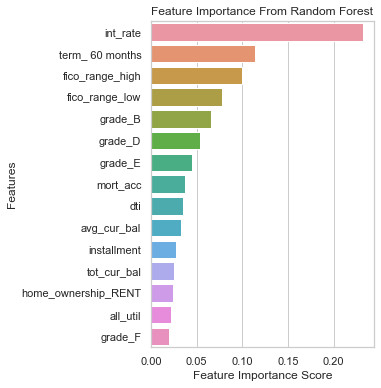

In [33]:
sorted_importance = sorted(zip(X_train_dum.columns, best_rf.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (4,6))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df.head(15), x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Feature Importance From Random Forest');
plt.xlabel('Feature Importance Score');
plt.ylabel('Features');